In [28]:
# 회귀분석

# 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭
# 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

# 회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로 나눌 수 있음

# 일반 선형 회귀 : 예측값과 실제값의 RSS를 최소화할 수 있도록 회귀계수를 최적화화며, 규제를 적용하지 않은 모델
# 릿지 : 선형 회귀에 L2 규제 추가
# 라쏘 : 선형 회귀에 L1 규제 적용
# 엘라스틱넷 : L2, L1 규제를 결합한 모델

In [29]:
# RSS

# 오류 값의 제곱을 구해서 더하는 방식
# 일반적으로 미분 등의 계산을 편리하게 하기 위해서 RSS 방식으로 오류 합을 구함

# 회귀식의 독립변수X, 종속변수 Y가 중심 변수가 아니라 w변수(회귀 계수)가 중심 변수임을 인지

# 비용함수, 손실함수
# 비용최소화 >> 경사하강법

# 다중공선성 문제

In [30]:
# 회귀평가

# MAE : metrics.mean_absolute_error : 'neg_mean_absolute_error'
# MSE : metrics.mean_squared_error : 'neg_mean_squared_error'
# R제곱 : metrics.r2_socre : 'r2'

### 전쟁충격으로 인한 농산물 가격변화

In [41]:
# 데이터 확인

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

before_df = pd.read_csv('../data_merge/before_data.csv')
after_df = pd.read_csv('../data_merge/after_data.csv')

print(before_df.shape)
before_df.head(3)

(98, 7)


,Date,ETF,WTI,ExchangeRate,Gold,Pork,ITA
0,2020-11-02,8045,36.81,1135.5,68650,2062.0,77.44
1,2020-11-03,8120,37.66,1133.0,69010,2061.0,79.91
2,2020-11-04,8165,39.15,1140.0,69400,2039.0,79.87


In [42]:
# 데이터 타입, null값 확인

before_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          98 non-null     object 
 1   ETF           98 non-null     int64  
 2   WTI           98 non-null     float64
 3   ExchangeRate  98 non-null     float64
 4   Gold          98 non-null     int64  
 5   Pork          98 non-null     float64
 6   ITA           98 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 5.5+ KB


In [48]:
# 데이터 타입 변경 삭제

# 문자열을 datetime 타입으로 변경
before_df['Date'] = pd.to_datetime(before_df['Date'])

# # datetime 타입에서 년, 월, 일, 시간 추출1
# bike_df['year'] = pd.DatetimeIndex(bike_df['datetime']).year
# bike_df['month'] = pd.DatetimeIndex(bike_df['datetime']).month
# bike_df['day'] = pd.DatetimeIndex(bike_df['datetime']).day
# bike_df['hour'] = pd.DatetimeIndex(bike_df['datetime']).hour

# # datetime 타입에서 년, 월, 일, 시간 추출2
# bike_df['year'] = bike_df['datetime'].dt.strftime('%Y')
# bike_df['month'] = bike_df['datetime'].dt.strftime('%m')
# bike_df['day'] = bike_df['datetime'].dt.strftime('%d')
# bike_df['hour'] = bike_df['datetime'].dt.strftime('%H')


# # datetime 타입에서 년, 월, 일, 시간 추출3
# before_df['year'] = before_df.datetime.apply(lambda x : x.year)
# before_df['month'] = before_df.datetime.apply(lambda x : x.month)
# before_df['day'] = before_df.datetime.apply(lambda x : x.day)
# before_df['hour'] = before_df.datetime.apply(lambda x : x.hour)

before_df

,Date,ETF,WTI,ExchangeRate,Gold,Pork,ITA
0,2020-11-02,8045,36.81,1135.5,68650,2062.0,77.44
1,2020-11-03,8120,37.66,1133.0,69010,2061.0,79.91
2,2020-11-04,8165,39.15,1140.0,69400,2039.0,79.87
3,2020-11-05,8335,38.79,1127.5,69250,2186.0,80.80
4,2020-11-06,8355,37.14,1122.5,69930,2181.0,80.73
...,...,...,...,...,...,...,...
93,2021-03-25,10045,58.56,1136.1,63220,2124.0,102.28
94,2021-03-26,9985,60.97,1131.5,62770,2124.0,102.64
95,2021-03-29,9950,61.56,1133.5,62840,2151.0,103.18
96,2021-03-30,9880,60.55,1134.5,62110,2157.0,103.84


In [49]:
# data type 확인후 불필요한 목록 삭제
before_df.info()

drop_columns = []
before_df.drop(drop_columns, axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          98 non-null     datetime64[ns]
 1   ETF           98 non-null     int64         
 2   WTI           98 non-null     float64       
 3   ExchangeRate  98 non-null     float64       
 4   Gold          98 non-null     int64         
 5   Pork          98 non-null     float64       
 6   ITA           98 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 5.5 KB


In [45]:
# 에러 함수들 정의 후 선형회귀 학습/예측
from sklearn.metrics import mean_absolute_error, mean_squared_error

# log 값 변환 시 NaN등의 이슈로 log()가 아닌 log1p()를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    sqaured_error = (log_y - log_pred) **2
    rmsle = np.sqrt(np.mean(sqaured_error))
    return rmsle

# 사이킷런의 mean_square_error()를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y, pred))

# MAE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y,pred)
    # MAE는 scikit learn의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print('RMLSE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [50]:
# 학습 데이터, 테스트 데이터 분리
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = before_df['ETF']
X_features = before_df.drop(['ETF','Date'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=107)

# 선형회귀 적용 후 학습/예측/평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMLSE: 0.028, RMSE: 272.701, MAE: 212.092


In [51]:
# 예측값과 실제값 오차 확인
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측값을 서로 비교할 수 있도록 생성
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값의 차이가 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

    real_count  predicted_count   diff
27       10180           9554.0  626.0
12        8700           9276.0  576.0
13       10055          10613.0  558.0
7         9970          10402.0  432.0
11       10045           9663.0  382.0


In [52]:
# 타겟값에 로그를 취해서 정규화

# 타겟 컬럼인 count를 log1p로 Log변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=107)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 exmp1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 테스트 데이터 셋의 Target값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

print('Variance score:{0:.3f}'.format(r2_score(y_test, pred)))
print('절편 값 :',lr_reg.intercept_)
print('회귀 계수값 :', np.round(lr_reg.coef_))

RMLSE: 0.029, RMSE: 286.190, MAE: 220.747
Variance score:0.872
절편 값 : 8.600549967555803
회귀 계수값 : [ 0. -0.  0. -0. -0.]


<AxesSubplot:>

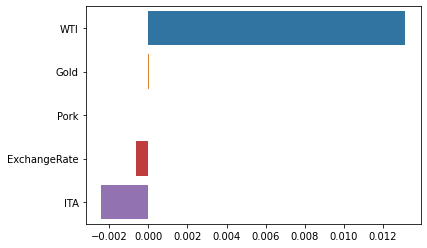

In [53]:
# 피처별 회귀계수 확인

coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)